In [1]:
import numpy as np
import pandas as pd
np.random.seed(123)  # for reproducibility

import matplotlib.pyplot as plt

<bound method NDFrame.head of      num_param  conv_1_size  conv_2_size  conv_3_size  fc_1_size  fc_2_size  \
0      87243.0        500.0          0.0          0.0    84550.0     2193.0   
1     173943.0        500.0          0.0          0.0   169100.0     4343.0   
2     347343.0        500.0          0.0          0.0   338200.0     8643.0   
3     520743.0        500.0          0.0          0.0   507300.0    12943.0   
4     694143.0        500.0          0.0          0.0   676400.0    17243.0   
..         ...          ...          ...          ...        ...        ...   
895  1302643.0      10000.0     640200.0     640200.0    10050.0     2193.0   
896  1314843.0      10000.0     640200.0     640200.0    20100.0     4343.0   
897  1339243.0      10000.0     640200.0     640200.0    40200.0     8643.0   
898  1363643.0      10000.0     640200.0     640200.0    60300.0    12943.0   
899  1388043.0      10000.0     640200.0     640200.0    80400.0    17243.0   

     test_acc  test_l

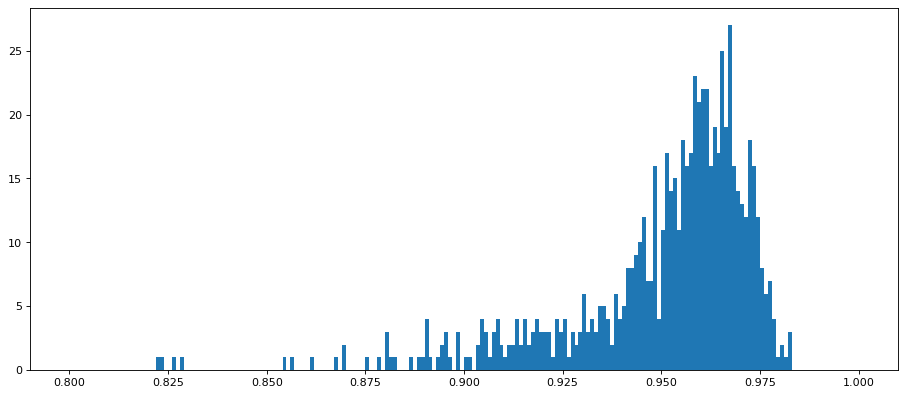

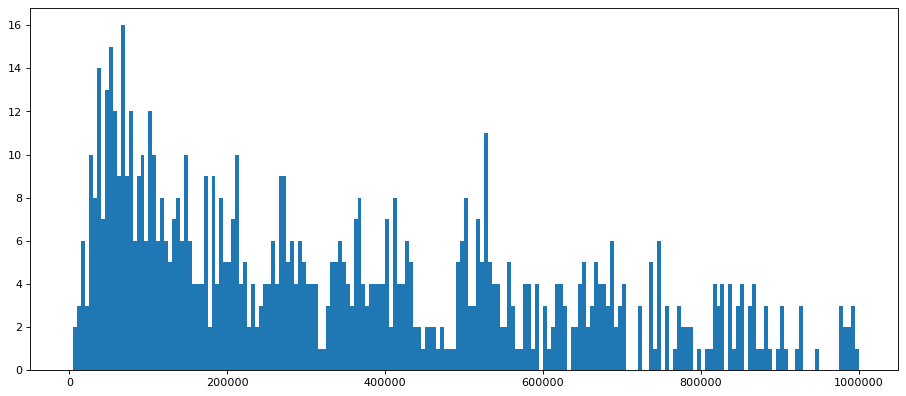

In [2]:
#results = np.loadtxt("Model_Comparison_Results.csv", delimiter=',')
header = ('num_param', 'conv_1_size', 'conv_2_size', 'conv_3_size', 'fc_1_size', 'fc_2_size', 'test_acc',\
          'test_loss', 'conv_1_elem', 'conv_2_elem', 'conv_3_elem', 'fc_1_elem')

results = pd.read_csv("Model_Comparison_Results.csv", names=header) 
print(results.head)

plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(results['test_acc'], range=(0.8, 1), bins=200)
plt.show()
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(results['num_param'], range=(0,1e6), bins=200)
plt.show()

In [3]:
weighted_score = 0.25*(1-results['test_loss'])+0.75*results['num_param']

results['weighted_score'] = weighted_score

print(results)

     num_param  conv_1_size  conv_2_size  conv_3_size  fc_1_size  fc_2_size  \
0      87243.0        500.0          0.0          0.0    84550.0     2193.0   
1     173943.0        500.0          0.0          0.0   169100.0     4343.0   
2     347343.0        500.0          0.0          0.0   338200.0     8643.0   
3     520743.0        500.0          0.0          0.0   507300.0    12943.0   
4     694143.0        500.0          0.0          0.0   676400.0    17243.0   
..         ...          ...          ...          ...        ...        ...   
895  1302643.0      10000.0     640200.0     640200.0    10050.0     2193.0   
896  1314843.0      10000.0     640200.0     640200.0    20100.0     4343.0   
897  1339243.0      10000.0     640200.0     640200.0    40200.0     8643.0   
898  1363643.0      10000.0     640200.0     640200.0    60300.0    12943.0   
899  1388043.0      10000.0     640200.0     640200.0    80400.0    17243.0   

     test_acc  test_loss  conv_1_elem  conv_2_elem 

In [4]:
# Index
# 'num_param', 'conv_1_size', 'conv_2_size', 'conv_3_size', 'fc_1_size', 'fc_2_size', 'test_acc', 'test_loss',
# 'conv_1_elem', 'conv_2_elem', 'conv_3_elem', 'fc_1_elem'

sorted_by_accuracy = results.sort_values('test_acc', axis=0, ascending=False)
print(sorted_by_accuracy.head())

sorted_by_loss = results.sort_values('test_loss', axis=0)
print(sorted_by_loss.head())

sorted_by_score = results.sort_values('weighted_score', axis=0)
print(sorted_by_score.head())

     num_param  conv_1_size  conv_2_size  conv_3_size  fc_1_size  fc_2_size  \
148   578093.0        500.0      24150.0     480200.0    60300.0    12943.0   
353   701093.0       2500.0     160200.0     480150.0    45300.0    12943.0   
172   551693.0        500.0      32200.0     480150.0    30200.0     8643.0   
328   676093.0       2500.0     120150.0     480200.0    60300.0    12943.0   
298   476043.0       2500.0      80100.0     320200.0    60300.0    12943.0   

     test_acc  test_loss  conv_1_elem  conv_2_elem  conv_3_elem  fc_1_elem  \
148  0.982964   0.090971         10.0        150.0        200.0      300.0   
353  0.982250   0.106980         50.0        200.0        150.0      300.0   
172  0.982148   0.102661         10.0        200.0        150.0      200.0   
328  0.981230   0.160940         50.0        150.0        200.0      300.0   
298  0.980924   0.116978         50.0        100.0        200.0      300.0   

     weighted_score  
148   433569.977257  
353   525819

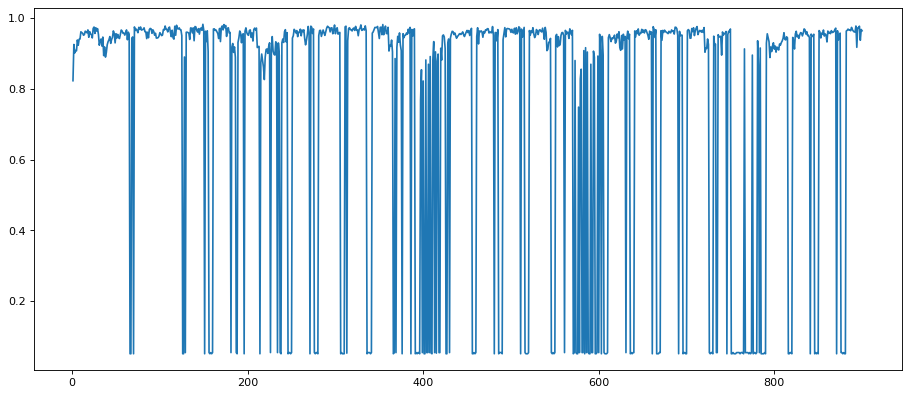

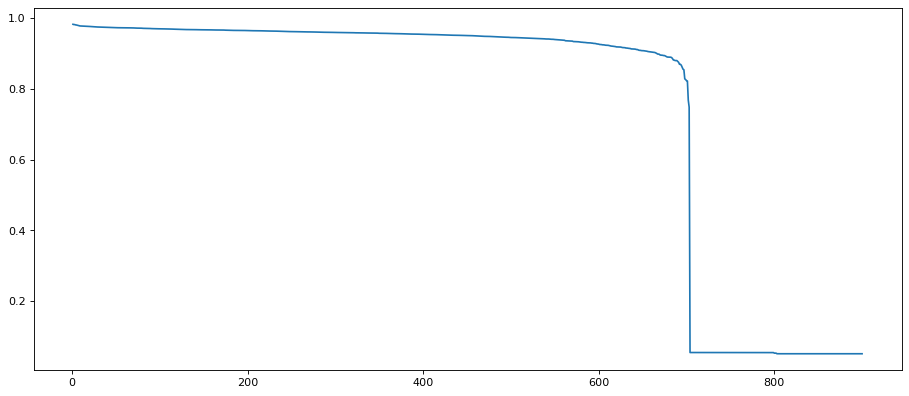

In [5]:
tests = np.linspace(1, 900, 900)
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tests, results['test_acc'])
plt.show()
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tests, sorted_by_accuracy['test_acc'])
plt.show()

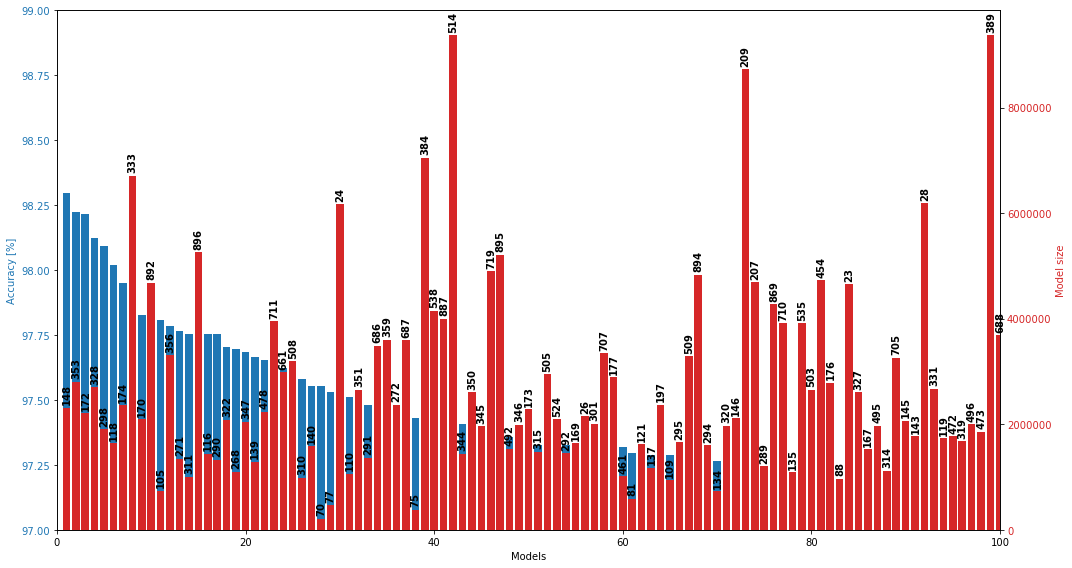

In [6]:
n_to_plot = 100

fig, acc = plt.subplots(figsize=(15,8))

color = 'tab:blue'
acc.set_xlabel('Models')
acc.set_ylabel("Accuracy [%]", color=color)
acc.bar(tests[0:n_to_plot], sorted_by_accuracy['test_acc'].iloc[0:100]*100)
acc.axis([0, n_to_plot,97 ,99])
acc.tick_params(axis='y', labelcolor=color)

par = acc.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
par.set_ylabel('Model size', color=color)  # we already handled the x-label with ax1
par.bar(tests[0:n_to_plot], sorted_by_accuracy['num_param'].iloc[0:100]*4, color=color)
par.tick_params(axis='y', labelcolor=color)

# Printing the model number
for i, v in enumerate(sorted_by_accuracy['num_param'].iloc[0:100].index):
    par.text(i+0.5, sorted_by_accuracy['num_param'].iloc[i]*4+100000, str(v), fontweight='bold', rotation=90)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [7]:
# Observe graphically that model 70 works pretty well
results.iloc[70]

num_param         53343.000000
conv_1_size         500.000000
conv_2_size        8050.000000
conv_3_size       40050.000000
fc_1_size          2550.000000
fc_2_size          2193.000000
test_acc              0.975518
test_loss             0.178142
conv_1_elem          10.000000
conv_2_elem          50.000000
conv_3_elem          50.000000
fc_1_elem            50.000000
weighted_score    40007.455465
Name: 70, dtype: float64